# <span style='color:Blue'> KPMG VIRTUAL INTERNSHIP PROGRAM </span>

## <span style='color:Maroon'> A step-by-step approach to improve the quality of dataset  </span>


## Potential Business: Optimizing marketing strategy

### <span style='color:green'> Here is the background information on the task </span>

Sprocket Central Pty Ltd , a medium size bikes & cycling accessories organization.The company is looking to leverage the insights and analysis provided by KPMG to grow its business by optimizing its marketing strategy. 

The client provided KPMG with 3 datasets to start the preliminary data exploration and identify ways to improve the quality of Sprocket Central Pty Ltd’s data:

1.	Customer Demographic 
2.	Customer Addresses
3.	Transaction data

In a nutshell, the tasks involve analyzing business data sets, improving their data quality and suggesting recommendations to ensure quality of future data. 
Creating customer segments based on customer behavior trends and patterns. 
Creating visualizations and dashboards in tableau to derive insights from existing customers and new customers.

### <span style='color:green'> Data Quality Framework Table </span>

#### Below is a list of the Data Quality dimensions to evaluate a dataset <br>

<img align="left" width="300"  src="https://cdn-assets.theforage.com/vinternship_modules/kpmg_data_analytics/Screen+Shot+2018-03-20+at+2.50.59+pm.png">


### <span style='color:green'> Lets Load the Required Libraries </span>

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
%matplotlib inline

class color:
   BLUE = '\033[94m'
   BOLD = '\033[1m'
   END = '\033[0m'

### <span style='color:green'> read in the excel datasets and put into a panda data frame </span>

In [3]:
excel_sheet = pd.ExcelFile('KPMG_VI_New_raw_data_update_final.xlsx')

## <span style='color:Blue'> Load Transaction data </span>


In [4]:
transactions = pd.read_excel(excel_sheet, sheet_name=1, header=1)
#isinstance(transactions, pd.DataFrame)

### <span style='color:green'> Overview of Data</span>

In [5]:
transactions.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,2015-08-10


In [6]:
transactions.tail()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
19995,19996,51,1018,2017-06-24,1.0,Approved,OHM Cycles,Standard,high,medium,2005.66,1203.40,2003-07-21
19996,19997,41,127,2017-11-09,1.0,Approved,Solex,Road,medium,medium,416.98,312.74,1997-05-10
19997,19998,87,2284,2017-04-14,1.0,Approved,OHM Cycles,Standard,medium,medium,1636.90,44.71,2010-08-20
19998,19999,6,2764,2017-07-03,0.0,Approved,OHM Cycles,Standard,high,medium,227.88,136.73,2004-08-17
19999,20000,11,1144,2017-09-22,1.0,Approved,Trek Bicycles,Standard,medium,small,1775.81,1580.47,1999-06-23


In [7]:
print(color.BOLD + "There are {} rows and {} columns in the dataset.".format(transactions.shape[0],transactions.shape[1]),"\n"+ color.END)
print(color.BOLD +color.BLUE +"Let's look at the data types available in the dataset"+ color.END)
transactions.info()

#print(color.BOLD +color.BLUE +"\n","Null values in the columns of dataset"+ color.END)
#transactions.isnull().sum()

#print(color.BOLD +color.BLUE +"\n","Summary statistics of dataset"+ color.END)
#transactions.describe()

There are 20000 rows and 13 columns in the dataset. 

Let's look at the data types available in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float

The data types have to be changed appropriately.<br>
Also there are some missing values in the dataset.<br>

In [8]:
transactions.customer_id.describe()

count    20000.000000
mean      1738.246050
std       1011.951046
min          1.000000
25%        857.750000
50%       1736.000000
75%       2613.000000
max       5034.000000
Name: customer_id, dtype: float64

In [9]:
#check if the customer_id are all in order from 1 to 4000
list_1 = transactions['customer_id'].to_list()
list_2 = list(range(1,3501))
if list_1==list_2: 
    print ("All customer_id are in order from 1 to 3500") 
else: 
    print ("All customer_id are not order in from 1 to 3500")

All customer_id are not order in from 1 to 3500


In [10]:
print(color.BOLD + "Min value in customer_id is {}".format(transactions['customer_id'].min()),"\n"+ color.END)
print(color.BOLD + "Max value in customer_id is {}".format(transactions['customer_id'].max()),"\n"+ color.END)
print(color.BOLD + "number of Unique values in customer_id are {}".format(transactions.customer_id.nunique()),"\n"+ color.END)

Min value in customer_id is 1 

Max value in customer_id is 5034 

number of Unique values in customer_id are 3494 



In [11]:
print(color.BOLD + "customerr_id between 1-3500 not in transactions {}".format(set(list_2).difference(list_1)),"\n"+ color.END)
print(color.BOLD + "customerr_id transactions not in between 1-3500 {}".format(set(list_1).difference(list_2)),"\n"+ color.END)

customerr_id between 1-3500 not in transactions {2660, 869, 3236, 852, 3229, 2074, 1373} 

customerr_id transactions not in between 1-3500 {5034} 



we will delete the entries from the above list [2660, 869, 3236, 852, 3229, 2074, 1373, 5034] for now
looks like customer_id 5034 is an outlier lets delete entries with that customer_id

In [12]:
transactions = transactions[~transactions['customer_id'].isin([2660, 869, 3236, 852, 3229, 2074, 1373, 5034])]

In [13]:
print(color.BOLD + "Now we have {} rows and {} columns in the dataset.".format(transactions.shape[0],transactions.shape[1]),"\n"+ color.END)


Now we have 19997 rows and 13 columns in the dataset. 



### <span style='color:green'>Check for duplicates in columns</span>

In [14]:
column_names = transactions.columns

for col in column_names:
    print((col, transactions[col].is_unique))

('transaction_id', True)
('product_id', False)
('customer_id', False)
('transaction_date', False)
('online_order', False)
('order_status', False)
('brand', False)
('product_line', False)
('product_class', False)
('product_size', False)
('list_price', False)
('standard_cost', False)
('product_first_sold_date', False)


As required transaction_id has all unique values for this data set it might be a primary key

In [15]:
#sort the columns by customer id and transaction date
transactions = transactions.sort_values(['transaction_date','transaction_id'])

### <span style='color:green'>Looking at categorical vairiables</span>

Number of unique values in online_order is 2 



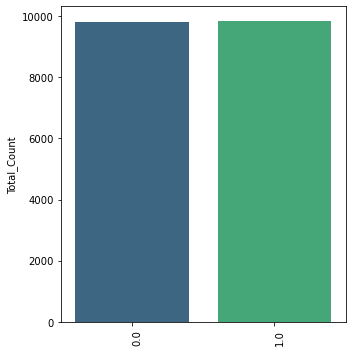


 -------------------------------------------------------------------------------------------------
Number of unique values in order_status is 2 



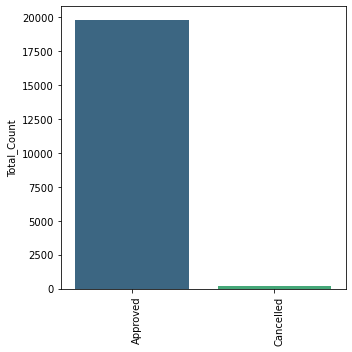


 -------------------------------------------------------------------------------------------------
Number of unique values in brand is 6 



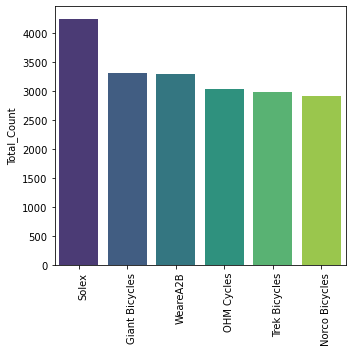


 -------------------------------------------------------------------------------------------------
Number of unique values in product_line is 4 



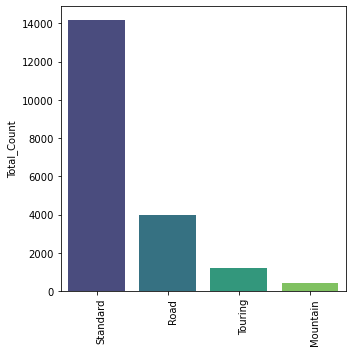


 -------------------------------------------------------------------------------------------------
Number of unique values in product_class is 3 



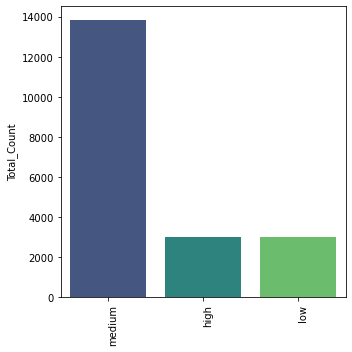


 -------------------------------------------------------------------------------------------------
Number of unique values in product_size is 3 



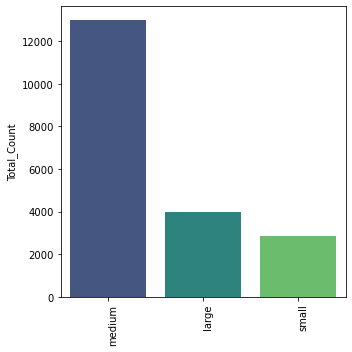


 -------------------------------------------------------------------------------------------------


In [16]:
%matplotlib inline
cat_column_list = ['online_order','order_status', 'brand', 'product_line', 'product_class', 'product_size']

for column in cat_column_list:
    count_uniques = pd.DataFrame(transactions[column].value_counts()).rename(columns={column:'Total_Count'}).sort_values('Total_Count',ascending=False)
    
    # parameters in format function.
    print(color.BOLD +"Number of unique values in {} is {}".format(column, count_uniques.shape[0]), "\n"+ color.END)

    # Create Figure
    fig, ax = plt.subplots(figsize=(5,5))

    ax = sns.barplot(x=count_uniques.index.values.tolist()  , y="Total_Count", data=count_uniques, palette= 'viridis')
    # rotates labels and aligns them horizontally to left 
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=90, ha="left" )

    plt.tight_layout()
    plt.show()

    print("\n",'-------------------------------------------------------------------------------------------------')

There are rows where order status is canceled we will delete those rows

In [17]:
transactions = transactions[transactions['order_status'] != 'Cancelled']

Since all the values in order_status are Approved we will delete this column

In [18]:
#drop order_status column
transactions.drop('order_status', axis=1, inplace=True)

### <span style='color:green'>Missing Value treatment</span>

In [19]:
print(color.BOLD +color.BLUE +"\n","Null values in the columns of dataset"+ color.END)
transactions.isnull().sum()


 Null values in the columns of dataset


transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               354
brand                      196
product_line               196
product_class              196
product_size               196
list_price                   0
standard_cost              196
product_first_sold_date    196
dtype: int64

There are still 360 values missing from 'online_order' replace them with mode of online_order

In [20]:
transactions["online_order"] = transactions['online_order'].fillna(transactions["online_order"].mode()[0])

Get list of customer ids Rows with NaN in brand, product_line, product_class, product_size, standard_cost, product_first_sold_date

In [21]:
print(color.BOLD +'Rows with NaN in brand, product_line, product_class, product_size, standard_cost, product_first_sold_date ',"\n"+ color.END)

nan_rows = transactions[transactions['brand'].isnull() 
                & transactions['product_line'].isnull()
                & transactions['product_class'].isnull()
                & transactions['product_size'].isnull()
                & transactions['standard_cost'].isnull()
                & transactions['product_first_sold_date'].isnull()]

nan_rows.shape[0]


Rows with NaN in brand, product_line, product_class, product_size, standard_cost, product_first_sold_date  



196

Looks like all 197 rows have no entries in the same columns brand, product_line, product_class, product_size, standard_cost, product_first_sold_date 

We will look at these rows later.<br>
But before that we can extract the customer ID information from these rows

In [22]:
nan_rows_custid=nan_rows['customer_id'].to_list()

for now we will delete rows where data is missing

In [23]:
transactions.dropna(subset=['brand'], inplace=True)

In [24]:
print(color.BOLD + "Now we have {} rows and {} columns in the dataset.".format(transactions.shape[0],transactions.shape[1]),"\n"+ color.END)


Now we have 19622 rows and 12 columns in the dataset. 



### <span style='color:green'>Change data type</span>

In [25]:
column_list = ['transaction_id', 'product_id', 'customer_id', 'online_order',
               'brand', 'product_line', 'product_class', 'product_size']
for col in column_list:
    transactions[col] = transactions[col].astype('category')   

## <span style='color:Blue'> Load CustomerDemographic and CustomerAddress data </span>

In [26]:
cust_demographics = pd.read_excel(excel_sheet, sheet_name=3, header=1)
cust_address = pd.read_excel(excel_sheet, sheet_name=4, header=1)
#isinstance(cust_address, pd.DataFrame)

C:\Users\chand\AppData\Local\Temp/ipykernel_2940/3233232332.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  cust_demographics = pd.read_excel(excel_sheet, sheet_name=3, header=1)


### <span style='color:green'> Overview of Data</span>

### cust_demographics dataset

In [27]:
print(color.BOLD + "There are {} rows and {} columns in the dataset.".format(cust_demographics.shape[0],cust_demographics.shape[1]),"\n"+ color.END)
print(color.BOLD +color.BLUE +"Let's look at the data types available in the dataset"+ color.END)
cust_demographics.info()

print(color.BOLD +color.BLUE +"\n","Null values in the columns of dataset"+ color.END)
cust_demographics.isnull().sum()

#print(color.BOLD +color.BLUE +"\n","Summary statistics of dataset"+ color.END)
#transactions.describe()

There are 4000 rows and 13 columns in the dataset. 

Let's look at the data types available in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null 

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
dtype: int64

In [28]:
cust_demographics.columns

Index(['customer_id', 'first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'default', 'owns_car', 'tenure'],
      dtype='object')

In [29]:
cust_demographics.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [30]:
cust_demographics.tail()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,-100,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,â¦testâ§,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,NaN,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Â¡â¢Â£Â¢âÂ§Â¶â¢ÂªÂºââ,Yes,10.0
3999,4000,Kippy,Oldland,Male,76,1991-11-05,Software Engineer IV,NaN,Affluent Customer,N,0/0,No,11.0


### cust_address dataset

In [31]:
print(color.BOLD + "There are {} rows and {} columns in the dataset.".format(cust_address.shape[0],cust_address.shape[1]),"\n"+ color.END)
print(color.BOLD +color.BLUE +"Let's look at the data types available in the dataset"+ color.END)
cust_address.info()

print(color.BOLD +color.BLUE +"\n","Null values in the columns of dataset"+ color.END)
cust_address.isnull().sum()

#print(color.BOLD +color.BLUE +"\n","Summary statistics of dataset"+ color.END)
#transactions.describe()

There are 3999 rows and 6 columns in the dataset. 

Let's look at the data types available in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB

 Null values in the columns of dataset


customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [32]:
cust_address.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [33]:
cust_address.tail()

,customer_id,address,postcode,state,country,property_valuation
3994,3999,1482 Hauk Trail,3064,VIC,Australia,3
3995,4000,57042 Village Green Point,4511,QLD,Australia,6
3996,4001,87 Crescent Oaks Alley,2756,NSW,Australia,10
3997,4002,8194 Lien Street,4032,QLD,Australia,7
3998,4003,320 Acker Drive,2251,NSW,Australia,7


### <span style='color:green'> Join cust_demographics and cust_address datasets</span>

In [34]:
customer_details = pd.merge(cust_demographics, cust_address, 
                          how="outer", left_on='customer_id', 
                          right_on='customer_id', suffixes=("_demographics", "_address"))


In [35]:
#check if all customer_id from customer demographic are in transactions
list_1 = customer_details['customer_id'].tolist()
list_2 = transactions['customer_id'].tolist()
result =  all(elem in list_2  for elem in list_1)
if result:
    print("Yes, all customer_id from customer demographic are in transactions")    
else :
    print("No, all customer_id from customer demographic are not in transactions")

No, all customer_id from customer demographic are not in transactions


Looks like there is information regarding customer demographic but not transactions

In [36]:
# Check datatypes
customer_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4003 entries, 0 to 4002
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4003 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   float64       
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

### default
There is a default column without a valid data delete it

In [37]:
#drop default column
customer_details.drop('default', axis=1, inplace=True)

### customer_id and postcode from int and float to objects 

In [38]:
# Change customer_id and postcode to objects
customer_details['customer_id'] = customer_details['customer_id'].astype(object)
customer_details['postcode'] = customer_details['postcode'].astype(object)

### DOB
Check if DOB are in order

In [39]:
print(color.BOLD + "Date of Birth of Oldest Customer is {}".format(min(customer_details['DOB'])),"\n"+ color.END)
print(color.BOLD + "Date of Birth of Youngest Customer is {}".format(max(customer_details['DOB'])),"\n"+ color.END)

Date of Birth of Oldest Customer is 1843-12-21 00:00:00 

Date of Birth of Youngest Customer is 2002-03-11 00:00:00 



1843-12-21 might be an incorrect entry<br>
we can change it to 1943-12-21 assuming that year was entered incorrectly

In [40]:
print(color.BOLD +'Rows with 1843-12-21 as DOB',"\n"+ color.END)
customer_details[customer_details['DOB']=='1843-12-21']

Rows with 1843-12-21 as DOB 



,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation
33,34,Jephthah,Bachmann,U,59.0,1843-12-21,Legal Assistant,IT,Affluent Customer,N,No,20.0,833 Luster Way,4005.0,QLD,Australia,8.0


In [41]:
# this will replace the DOB which is outlier
customer_details['DOB'].replace(to_replace ="1843-12-21", value ="1943-12-21", inplace=True)

### <span style='color:green'> Looking at categorical variables</span>

Number of unique values in gender is 6 



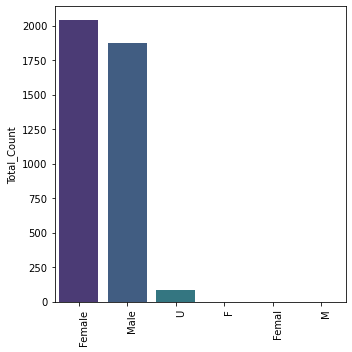


 -------------------------------------------------------------------------------------------------
Number of unique values in job_industry_category is 9 



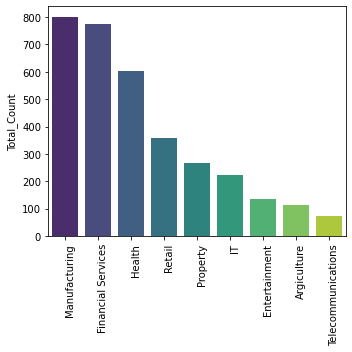


 -------------------------------------------------------------------------------------------------
Number of unique values in wealth_segment is 3 



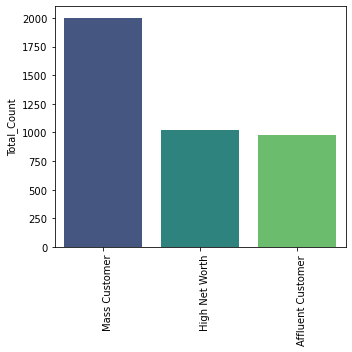


 -------------------------------------------------------------------------------------------------
Number of unique values in deceased_indicator is 2 



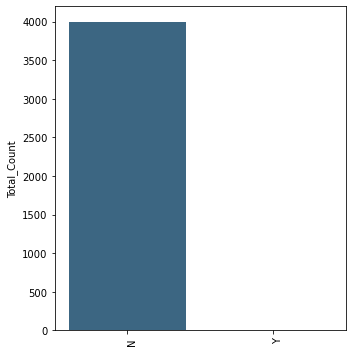


 -------------------------------------------------------------------------------------------------
Number of unique values in owns_car is 2 



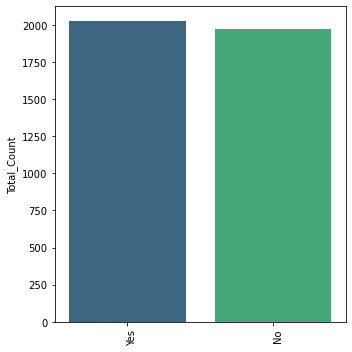


 -------------------------------------------------------------------------------------------------
Number of unique values in state is 5 



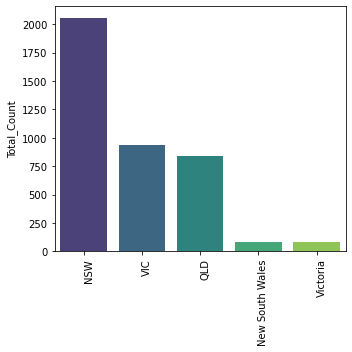


 -------------------------------------------------------------------------------------------------
Number of unique values in country is 1 



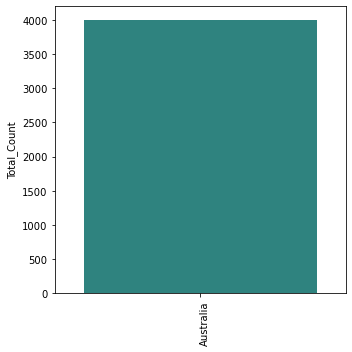


 -------------------------------------------------------------------------------------------------


In [42]:
%matplotlib inline
cat_column_list = ['gender','job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'state', 'country']

for column in cat_column_list:
    count_uniques = pd.DataFrame(customer_details[column].value_counts()).rename(columns={column:'Total_Count'}).sort_values('Total_Count',ascending=False)
    
    # parameters in format function.
    print(color.BOLD +"Number of unique values in {} is {}".format(column, count_uniques.shape[0]), "\n"+ color.END)

    # Create Figure
    fig, ax = plt.subplots(figsize=(5,5))

    ax = sns.barplot(x=count_uniques.index.values.tolist()  , y="Total_Count", data=count_uniques, palette= 'viridis')
    # rotates labels and aligns them horizontally to left 
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=90, ha="left" )

    plt.tight_layout()
    plt.show()

    print("\n",'-------------------------------------------------------------------------------------------------')

### gender
In Gender Female & F,Femal and also Male & M are same we can replace those values

In [43]:
gender_dict = {"F" : 'Female', "Femal" : 'Female', "M" : 'Male', "U" : 'Unidentified'}
customer_details.replace({"gender": gender_dict},inplace=True)

### state
In states NSW & New South Wales and also VIC & Victoria are same we can replace those values

In [44]:
state_dict = {"NSW" : 'New South Wales', "VIC" : 'Victoria', "QLD" : 'Queensland'}
customer_details.replace({"state": state_dict},inplace=True)

### owns_car
Encode owns car to "Yes" : 1, "No" : 0

In [45]:
car_dict = {"Yes" : 1, "No" : 0}
customer_details.replace({"owns_car": car_dict},inplace=True)

### deceased_indicator
Delete customers who are deceased and delete the column

In [46]:
customer_details = customer_details[customer_details['deceased_indicator'] != 'Y']

Now data points have customers who are alive we will delete this column
#drop deceased_indicator column

In [47]:
customer_details.drop('deceased_indicator', axis=1, inplace=True)

### <span style='color:green'>Create new columns</span>

### age

In [48]:
current_year = dt.datetime.now().year #get current year
customer_details['year'] = pd.DatetimeIndex(customer_details['DOB']).year
customer_details["age"] = customer_details['year'].apply(lambda x: current_year-x)  # substract to get the year delta

In [49]:
# after calculating ade we can drop DOB and year columns
customer_details.drop(['DOB','year'], axis = 1, inplace=True)

### <span style='color:green'>Check for duplicates in columns</span>

In [50]:
column_names = customer_details.columns

for col in column_names:
    print((col, customer_details[col].is_unique))

('customer_id', True)
('first_name', False)
('last_name', False)
('gender', False)
('past_3_years_bike_related_purchases', False)
('job_title', False)
('job_industry_category', False)
('wealth_segment', False)
('owns_car', False)
('tenure', False)
('address', False)
('postcode', False)
('state', False)
('country', False)
('property_valuation', False)
('age', False)


As required customer_id has all unique values for this data set it might be a primary key

### <span style='color:green'>Change data type</span>

In [51]:
customer_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4001 entries, 0 to 4002
Data columns (total 16 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          4001 non-null   object 
 1   first_name                           3998 non-null   object 
 2   last_name                            3873 non-null   object 
 3   gender                               3998 non-null   object 
 4   past_3_years_bike_related_purchases  3998 non-null   float64
 5   job_title                            3492 non-null   object 
 6   job_industry_category                3342 non-null   object 
 7   wealth_segment                       3998 non-null   object 
 8   owns_car                             3998 non-null   float64
 9   tenure                               3911 non-null   float64
 10  address                              3997 non-null   object 
 11  postcode                      

All column are in order

### <span style='color:green'>Missing Value treatment</span>

In [52]:
print(color.BOLD +color.BLUE +"\n","Null values in the columns of dataset"+ color.END)
customer_details.isnull().sum()


 Null values in the columns of dataset


customer_id                              0
first_name                               3
last_name                              128
gender                                   3
past_3_years_bike_related_purchases      3
job_title                              509
job_industry_category                  659
wealth_segment                           3
owns_car                                 3
tenure                                  90
address                                  4
postcode                                 4
state                                    4
country                                  4
property_valuation                       4
age                                     90
dtype: int64

### First name

In [53]:
print(color.BOLD +'Rows where first_name is blank',"\n"+ color.END)
customer_details[customer_details['first_name'].isna()]

Rows where first_name is blank 



,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,age
4000,4001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87 Crescent Oaks Alley,2756.0,New South Wales,Australia,10.0,NaN
4001,4002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8194 Lien Street,4032.0,Queensland,Australia,7.0,NaN
4002,4003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320 Acker Drive,2251.0,New South Wales,Australia,7.0,NaN


we can delete these rows as there is no information given in most of the columns but before that we will check if there are any transactions in the transaction dataset

In [54]:
transactions[transactions['customer_id'].isin([4001, 4002, 4003])].shape[0]

0

So there are transactions relating to these customer ids, hence we will delete these rows

In [55]:
customer_details = customer_details[~customer_details['customer_id'].isin([4001, 4002, 4003])]

This addresses missing values from most of the columns

### job_industry_category

In [56]:
customer_details['job_industry_category'] = customer_details.groupby(['gender','age','postcode'], sort=True)['job_industry_category'].fillna(customer_details['job_industry_category'].mode()[0])

replaced the missing values in the job_industry_category with group mode of 'gender','age','postcode'
There are still some more values missing replace them with group by state and mode

In [57]:
customer_details['job_industry_category'] = customer_details.groupby(['state'], sort=True)['job_industry_category'].fillna(customer_details['job_industry_category'].mode()[0])

In [58]:
customer_details['job_industry_category'] = customer_details['job_industry_category'].fillna(customer_details['job_industry_category'].mode()[0])

### job_title

In [59]:
customer_details['job_title'] = customer_details.groupby(['gender','age','job_industry_category','postcode'], sort=True)['job_title'].fillna(customer_details["job_title"].mode()[0])

replaced the missing values in the job_title with group mode of 'gender','age','job_industry_category','postcode'

In [60]:
customer_details['job_title'] = customer_details.groupby(['state','job_industry_category'], sort=True)['job_title'].fillna(customer_details["job_title"].mode()[0])

replaced the missing values in the job_title with group mode of 'state' & 'job_industry_category'

In [61]:
customer_details['job_title'] = customer_details['job_title'].fillna(customer_details["job_title"].mode()[0])

replaced the missing values in the job_title with group mode 

### deceased_indicator
Though deceased_indicator has no missing values, it is difficult to say if the values are correct.<br>
If we wish to retain such data, it has to be updated frequently.

### Rows where address, postcode, state, country, property_valuation is blank

In [62]:
print(color.BOLD +'Rows where address is blank',"\n"+ color.END)
customer_details[customer_details['address'].isna()]

Rows where address is blank 



,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,address,postcode,state,country,property_valuation,age
2,3,Arlin,Dearle,Male,61.0,Business Systems Development Analyst,Manufacturing,Mass Customer,1.0,15.0,NaN,NaN,NaN,NaN,NaN,68.0
9,10,Fiorenze,Birdall,Female,49.0,Business Systems Development Analyst,Manufacturing,Mass Customer,1.0,20.0,NaN,NaN,NaN,NaN,NaN,34.0
21,22,Deeanne,Durtnell,Female,79.0,Business Systems Development Analyst,Manufacturing,Mass Customer,0.0,11.0,NaN,NaN,NaN,NaN,NaN,60.0
22,23,Olav,Polak,Male,43.0,Business Systems Development Analyst,Manufacturing,High Net Worth,1.0,1.0,NaN,NaN,NaN,NaN,NaN,27.0


These are the rows where address, postcode, state, country, property_valuation are all blank.<br>
Lets check if there is any information on transaction.

In [63]:
transactions[transactions['customer_id'].isin([3, 10, 22, 23])].shape[0]

26

There are 26 transactions with these customer_id, we will not delete these rows.<br>

replace missing in country with Australia

In [64]:
customer_details['country'] = customer_details['country'].fillna('Australia')

we will replace missing values in state, postcode and property_valuation with the mode for state, mode for postcode after group by on state and mean for property evaluation after group by on state

In [65]:
customer_details['state'] = customer_details['state'].fillna(customer_details['state'].mode()[0])

In [66]:
customer_details['postcode'] = customer_details.groupby(['state'])['postcode'].fillna(customer_details['postcode'].mode()[0])

In [67]:
customer_details['property_valuation'] = customer_details.groupby(['state'])['property_valuation'].fillna(customer_details['property_valuation'].mean()).round(0)

In [68]:
#customer_details.loc[customer_details['customer_id'].isin([3, 10, 22, 23])]

### customer_id 

In [69]:
print(color.BOLD + "Min value in customer_id is {}".format(customer_details['customer_id'].min()),"\n"+ color.END)
print(color.BOLD + "Max value in customer_id is {}".format(customer_details['customer_id'].max()),"\n"+ color.END)
print(color.BOLD + "Total numer entries is {}".format(customer_details['customer_id'].max() - customer_details['customer_id'].min()),"\n"+ color.END)

Min value in customer_id is 1 

Max value in customer_id is 4000 

Total numer entries is 3999 



In [70]:
#check if the customer_id are all in order from 1 to 4000
list_1 = customer_details['customer_id'].to_list()
list_2 = list(range(1,4001))
if list_1==list_2: 
    print ("All customer_id are in order from 1 to 4000") 
else: 
    print ("All customer_id are not order in from 1 to 4000") 

All customer_id are not order in from 1 to 4000


In [71]:
#check if all customer_id from customer demographic are in transactions
list_1 = customer_details['customer_id'].tolist()
list_2 = transactions['customer_id'].tolist()
result =  all(elem in list_2 for elem in list_1)
if result:
    print("Yes, all customer_id from transactions are in customer demographic")    
else :
    print("No, all customer_id from transactions are not in customer demographic")

No, all customer_id from transactions are not in customer demographic


###  'first_name','last_name','address','postcode','country'

columns such as 'first_name','last_name','address','postcode','country' are not relevant for model building
we will drop these columns

In [72]:
customer_details.drop(['first_name','last_name','address'], axis = 1, inplace=True)

In [73]:
print(color.BOLD +color.BLUE +"\n","Null values in the columns of dataset"+ color.END)
customer_details.isnull().sum()


 Null values in the columns of dataset


customer_id                             0
gender                                  0
past_3_years_bike_related_purchases     0
job_title                               0
job_industry_category                   0
wealth_segment                          0
owns_car                                0
tenure                                 87
postcode                                0
state                                   0
country                                 0
property_valuation                      0
age                                    87
dtype: int64

### delete remaining with null values

There are still some rows where we have missing values for now we will delete rows where data is missing

In [74]:
customer_details.dropna(subset = ["age"], inplace=True)

In [75]:
customer_details.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3911 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          3911 non-null   object 
 1   gender                               3911 non-null   object 
 2   past_3_years_bike_related_purchases  3911 non-null   float64
 3   job_title                            3911 non-null   object 
 4   job_industry_category                3911 non-null   object 
 5   wealth_segment                       3911 non-null   object 
 6   owns_car                             3911 non-null   float64
 7   tenure                               3911 non-null   float64
 8   postcode                             3911 non-null   float64
 9   state                                3911 non-null   object 
 10  country                              3911 non-null   object 
 11  property_valuation            

In [76]:
print(color.BOLD + "Now we have {} rows and {} columns in the dataset.".format(customer_details.shape[0],transactions.shape[1]),"\n"+ color.END)

Now we have 3911 rows and 12 columns in the dataset. 



In [77]:
customer_details[customer_details['gender']=='Unidentified']

,customer_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,property_valuation,age
33,34,Unidentified,59.0,Legal Assistant,IT,Affluent Customer,0.0,20.0,4005.0,Queensland,Australia,8.0,79.0


## <span style='color:Blue'> Join customer data and transaction datasets  </span>


In [78]:
all_transactions = pd.merge(transactions, customer_details, 
                            how="outer", left_on='customer_id', 
                            right_on='customer_id')
#cust_demo_addr.to_csv("cust_demo_addr.csv")

### <span style='color:green'>Missing Value treatment</span>

In [79]:
print(color.BOLD +color.BLUE +"\n","Null values in the columns of dataset"+ color.END)
all_transactions.isnull().sum()


 Null values in the columns of dataset


transaction_id                         496
product_id                             496
customer_id                              0
transaction_date                       496
online_order                           496
brand                                  496
product_line                           496
product_class                          496
product_size                           496
list_price                             496
standard_cost                          496
product_first_sold_date                496
gender                                 444
past_3_years_bike_related_purchases    444
job_title                              444
job_industry_category                  444
wealth_segment                         444
owns_car                               444
tenure                                 444
postcode                               444
state                                  444
country                                444
property_valuation                     444
age        

In [80]:
all_transactions[all_transactions['transaction_id'].isnull()]

,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,property_valuation,age
19622,NaN,NaN,287,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Nuclear Power Engineer,Manufacturing,Affluent Customer,0.0,4.0,2765.0,New South Wales,Australia,8.0,37.0
19623,NaN,NaN,852,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Compensation Analyst,Financial Services,Affluent Customer,1.0,2.0,2336.0,New South Wales,Australia,7.0,22.0
19624,NaN,NaN,869,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Account Representative I,Financial Services,High Net Worth,1.0,10.0,2065.0,New South Wales,Australia,10.0,38.0
19625,NaN,NaN,1373,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Director of Sales,Financial Services,Mass Customer,1.0,12.0,3198.0,Victoria,Australia,8.0,64.0
19626,NaN,NaN,2074,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Business Systems Development Analyst,Financial Services,Mass Customer,0.0,4.0,2281.0,New South Wales,Australia,7.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20113,NaN,NaN,3995,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Staff Scientist,Manufacturing,Mass Customer,1.0,14.0,2088.0,New South Wales,Australia,12.0,47.0
20114,NaN,NaN,3996,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,VP Product Management,Health,Mass Customer,0.0,19.0,3977.0,Victoria,Australia,6.0,47.0
20115,NaN,NaN,3997,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Statistician II,Manufacturing,High Net Worth,1.0,1.0,2350.0,New South Wales,Australia,2.0,21.0
20116,NaN,NaN,3999,NaT,NaN,NaN,NaN,NaN,NaN,NaN,...,Business Systems Development Analyst,Manufacturing,Affluent Customer,1.0,10.0,3064.0,Victoria,Australia,3.0,49.0


### delete rows without transaction

In [81]:
all_transactions.dropna(subset=['transaction_id'], inplace=True)

In [82]:
print(color.BOLD +'customer_id where gender is blank',"\n"+ color.END)
all_transactions[all_transactions['gender'].isna()]['customer_id'].unique()

customer_id where gender is blank 



array([892, 513, 1351, 2335, 3365, 2069, 2647, 1583, 2963, 1509, 548,
       1210, 799, 3255, 1806, 2999, 1044, 983, 267, 996, 3343, 1477, 3322,
       451, 3312, 883, 1773, 3298, 3222, 950, 3151, 1780, 168, 2252, 3223,
       975, 2696, 3012, 2165, 2697, 839, 1990, 453, 1938, 144, 3288, 2642,
       454, 2414, 2426, 1082, 1683, 2021, 2540, 582, 2469, 2341, 1244,
       2920, 3086, 1740, 480, 680, 526, 2205, 599, 3473, 290, 1918, 753,
       685, 2295, 2854, 1174, 2000, 1038, 1628], dtype=object)

In [83]:
print(color.BOLD +'rows where gender is blank',"\n"+ color.END)
all_transactions[all_transactions['gender'].isnull()]

rows where gender is blank 



,transaction_id,product_id,customer_id,transaction_date,online_order,brand,product_line,product_class,product_size,list_price,...,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,property_valuation,age
439,9037,49,892,2017-01-02,0.0,Trek Bicycles,Road,medium,medium,533.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
440,1843,85,892,2017-01-09,1.0,WeareA2B,Standard,medium,medium,752.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
441,14562,11,892,2017-04-20,0.0,Giant Bicycles,Standard,high,medium,1274.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
442,19069,69,892,2017-05-24,0.0,Giant Bicycles,Road,medium,medium,792.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443,10350,11,892,2017-06-09,0.0,Giant Bicycles,Standard,high,medium,1274.93,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19216,5865,60,1038,2017-11-28,1.0,Giant Bicycles,Standard,high,small,1977.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19217,122,24,1038,2017-12-01,1.0,Solex,Road,medium,large,1777.80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19218,12141,82,1038,2017-12-18,0.0,Norco Bicycles,Standard,high,medium,1148.64,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19363,10027,3,1628,2017-08-08,0.0,Trek Bicycles,Standard,medium,large,2091.47,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


delete all rows where gender and other details are not available

In [84]:
all_transactions.dropna(subset=['gender'], inplace=True)

In [85]:
print(color.BOLD +color.BLUE +"\n","No morer null in dataset"+ color.END)
all_transactions.isnull().sum()


 No morer null in dataset


transaction_id                         0
product_id                             0
customer_id                            0
transaction_date                       0
online_order                           0
brand                                  0
product_line                           0
product_class                          0
product_size                           0
list_price                             0
standard_cost                          0
product_first_sold_date                0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
postcode                               0
state                                  0
country                                0
property_valuation                     0
age                                    0
dtype: int64

In [86]:
print(color.BOLD + "Now we have {} rows and {} columns in the dataset.".format(all_transactions.shape[0],all_transactions.shape[1]),"\n"+ color.END)


Now we have 19178 rows and 24 columns in the dataset. 



In [87]:
print(color.BOLD + "Now we have {} customer_id in the dataset.".format(len(pd.unique(all_transactions['customer_id']))),"\n"+ color.END)
 

Now we have 3415 customer_id in the dataset. 



In [88]:
#all_transactions.to_csv("all_transactions_existing_customers.csv")

In [89]:
#all_transactions.to_excel("all_transactions_existing_customers.xlsx")  

### <span style='color:green'>Prepare data for model building</span>

In [90]:
all_customer_details=all_transactions

In [91]:
all_customer_details.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'brand', 'product_line', 'product_class',
       'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date', 'gender',
       'past_3_years_bike_related_purchases', 'job_title',
       'job_industry_category', 'wealth_segment', 'owns_car', 'tenure',
       'postcode', 'state', 'country', 'property_valuation', 'age'],
      dtype='object')

In [92]:
all_customer_details.shape

(19178, 24)

### RFM analysis
RFM stands for recency, frequency, monetary value.<br> In business analytics, we often use this concept to divide customers into different segments, like high-value customers, medium value customers or low-value customers, and similarly many others.<br>

### Calculating Recency
Here we are calculating recency for customers who had made a purchase with a company.

In [93]:
print(color.BOLD + "Oldest transaction date is {}".format(min(all_customer_details['transaction_date'])),"\n"+ color.END)
print(color.BOLD + "Latest transaction date is {}".format(max(all_customer_details['transaction_date'])),"\n"+ color.END)

Oldest transaction date is 2017-01-01 00:00:00 

Latest transaction date is 2017-12-30 00:00:00 



Since all the date values belong to 2017 we will take Jan 1 2018 as the benchmark to calculate the recency

In [94]:
benchmark_date = datetime(2018, 1, 1)
all_customer_details['recency'] = all_customer_details['transaction_date'].apply(lambda x: (benchmark_date - x).days)

### Calculating Frequency
We are here calculating the frequency of frequent transactions of the customer in ordering/buying some product from the company.
Count unique transactions for each customer

### Calculating Monetary Value
Here we are calculating the monetary value of customer spend on purchasing products from the company.
Total list_price(spending) for each customer

In [95]:
df_ = all_customer_details.copy()

In [96]:
all_customer_details= all_customer_details.groupby(['customer_id'], sort=True).agg({'standard_cost': 'sum', 'online_order': lambda x: x.mode()[0],
                                                                                    'list_price': 'sum','recency':'min', 'transaction_id': lambda x: x.nunique(),
                                                                                   'gender': lambda x: x.mode()[0],'past_3_years_bike_related_purchases': lambda x: x.mode()[0], 
                                                                                    'job_title': lambda x: x.mode()[0],'job_industry_category': lambda x: x.mode()[0],
                                                                                    'wealth_segment': lambda x: x.mode()[0], 'owns_car': lambda x: x.mode()[0],'tenure': lambda x: x.mode()[0],
                                                                                    'postcode': lambda x: x.mode()[0],'state': lambda x: x.mode()[0], 'country': lambda x: x.mode()[0],
                                                                                    'property_valuation': lambda x: x.mode()[0],'age': lambda x: x.mode()[0]}).reset_index()

In [97]:
all_customer_details.shape

(3415, 18)

In [98]:
all_customer_details

,customer_id,standard_cost,online_order,list_price,recency,transaction_id,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,owns_car,tenure,postcode,state,country,property_valuation,age
0,1,6066.36,1.0,9084.45,9,11,Female,93.0,Executive Secretary,Health,Mass Customer,1.0,11.0,2016.0,New South Wales,Australia,10.0,69.0
1,2,1922.81,0.0,4149.07,130,3,Male,81.0,Administrative Officer,Financial Services,Mass Customer,1.0,16.0,2153.0,New South Wales,Australia,10.0,42.0
2,3,6525.42,0.0,9888.23,104,8,Male,61.0,Business Systems Development Analyst,Manufacturing,Mass Customer,1.0,15.0,2170.0,New South Wales,Australia,8.0,68.0
3,4,827.15,0.0,1047.72,197,2,Male,33.0,Business Systems Development Analyst,IT,Mass Customer,0.0,7.0,4211.0,Queensland,Australia,9.0,61.0
4,5,3508.26,0.0,5903.20,18,6,Female,56.0,Senior Editor,Manufacturing,Affluent Customer,1.0,8.0,2448.0,New South Wales,Australia,4.0,45.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,3496,2679.54,1.0,4725.38,258,4,Male,99.0,Editor,Manufacturing,Mass Customer,1.0,19.0,2171.0,New South Wales,Australia,9.0,36.0
3411,3497,2095.75,1.0,3744.07,54,3,Female,73.0,Administrative Assistant IV,Manufacturing,Affluent Customer,1.0,18.0,3976.0,Victoria,Australia,5.0,36.0
3412,3498,2029.73,1.0,5177.06,129,6,Female,28.0,Business Systems Development Analyst,Manufacturing,Mass Customer,0.0,5.0,3012.0,Victoria,Australia,4.0,27.0
3413,3499,2718.23,1.0,7673.48,53,7,Male,29.0,Business Systems Development Analyst,Manufacturing,Mass Customer,1.0,7.0,4073.0,Queensland,Australia,9.0,43.0


Here online_order indicates the most preferred mode of oder on-line or off-line

### Rename columns


In [99]:
all_customer_details.rename(columns={'list_price': 'monetary', 'transaction_id': 'frequency'}, inplace=True)

In [100]:
print(color.BOLD + "Now we have details for {} in the dataset.".format(len(all_customer_details)),"\n"+ color.END)


Now we have details for 3415 in the dataset. 



### Ranking Customer’s based upon their recency, frequency, and monetary score
Here we are normalizing the rank of the customers within a company to analyze the ranking.

In [101]:
all_customer_details['R_rank'] = all_customer_details['recency'].rank(ascending=False)
all_customer_details['F_rank'] = all_customer_details['frequency'].rank(ascending=True)
all_customer_details['M_rank'] = all_customer_details['monetary'].rank(ascending=True)

In [102]:
def normalize(x,maximum_x):
    return((x/maximum_x)*100)

# normalizing the rank of the customers
all_customer_details['R_rank_norm'] = all_customer_details['R_rank'].apply(lambda x: normalize(x, all_customer_details['R_rank'].max()))
all_customer_details['F_rank_norm'] = all_customer_details['F_rank'].apply(lambda x: normalize(x, all_customer_details['F_rank'].max()))
all_customer_details['M_rank_norm'] = all_customer_details['M_rank'].apply(lambda x: normalize(x, all_customer_details['M_rank'].max()))

all_customer_details.drop(columns=['R_rank', 'F_rank', 'M_rank'], inplace=True)

### Calculating RFM score
RFM score is calculated based upon recency, frequency, monetary value normalize ranks.<br> Based upon this score we divide our customers. Here we rate them on a scale of 5.<br>  Formula used for calculating rfm score is : 0.15*Recency score + 0.28*Frequency score + 0.57 *Monetary score

### Weight.
By default, the highest importance when calculating scores is given to the recency data, followed by frequency, and then monetary. If required, you can amend the weighting affecting one or several of these to change which is given the highest importance.

The RFM score is calculated as follows: (Recency score x Recency weight) + (Frequency score x Frequency weight) + (Monetary score x Monetary weight).

In [103]:
all_customer_details['RFM_Score'] = 0.25 * all_customer_details['R_rank_norm']+0.35 * all_customer_details['F_rank_norm']+0.5 * all_customer_details['M_rank_norm']
all_customer_details['RFM_Score'] *= 0.05
all_customer_details = all_customer_details.round(2)

In [104]:
all_customer_details

,customer_id,standard_cost,online_order,monetary,recency,frequency,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,...,tenure,postcode,state,country,property_valuation,age,R_rank_norm,F_rank_norm,M_rank_norm,RFM_Score
0,1,6066.36,1.0,9084.45,9,11,Female,93.0,Executive Secretary,Health,...,11.0,2016.0,New South Wales,Australia,10.0,69.0,90.21,98.04,83.81,4.94
1,2,1922.81,0.0,4149.07,130,3,Male,81.0,Administrative Officer,Financial Services,...,16.0,2153.0,New South Wales,Australia,10.0,42.0,13.43,13.05,25.42,1.03
2,3,6525.42,0.0,9888.23,104,8,Male,61.0,Business Systems Development Analyst,Manufacturing,...,15.0,2170.0,New South Wales,Australia,8.0,68.0,19.59,84.68,88.40,3.94
3,4,827.15,0.0,1047.72,197,2,Male,33.0,Business Systems Development Analyst,IT,...,7.0,4211.0,Queensland,Australia,9.0,61.0,4.08,4.61,1.76,0.18
4,5,3508.26,0.0,5903.20,18,6,Female,56.0,Senior Editor,Manufacturing,...,8.0,2448.0,New South Wales,Australia,4.0,45.0,77.95,59.09,49.69,3.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3410,3496,2679.54,1.0,4725.38,258,4,Male,99.0,Editor,Manufacturing,...,19.0,2171.0,New South Wales,Australia,9.0,36.0,1.36,25.94,33.56,1.31
3411,3497,2095.75,1.0,3744.07,54,3,Female,73.0,Administrative Assistant IV,Manufacturing,...,18.0,3976.0,Victoria,Australia,5.0,36.0,45.16,13.05,20.59,1.31
3412,3498,2029.73,1.0,5177.06,129,6,Female,28.0,Business Systems Development Analyst,Manufacturing,...,5.0,3012.0,Victoria,Australia,4.0,27.0,13.59,59.09,39.94,2.20
3413,3499,2718.23,1.0,7673.48,53,7,Male,29.0,Business Systems Development Analyst,Manufacturing,...,7.0,4073.0,Queensland,Australia,9.0,43.0,45.81,73.93,71.30,3.65


In [105]:
all_customer_details[['recency','frequency','monetary','RFM_Score']].describe()

,recency,frequency,monetary,RFM_Score
count,3415.000000,3415.000000,3415.000000,3415.000000
mean,64.091654,5.615813,6212.168067,2.755192
std,58.717015,2.296552,2927.980764,1.339610
min,2.000000,1.000000,60.340000,0.020000
25%,20.000000,4.000000,4112.745000,1.680000
50%,47.000000,5.000000,5930.270000,2.750000
75%,89.000000,7.000000,8059.600000,3.850000
max,355.000000,14.000000,19071.320000,5.460000


C:\Users\chand\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


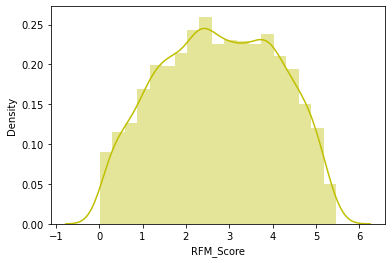

In [106]:
import seaborn as sns
ax = sns.distplot(all_customer_details['RFM_Score'], color="y")

##### Rating Customer based upon the RFM score
* rfm score >4.50 : 'Premium Customer'<br>
* 4.50 > rfm score > 4.00 : 'High Value Customer'<br>
* 4.00>rfm score >3.00 : 'Loyal Customer'<br>
* 3.00>rfm score>1.50 : 'Budget Customer'<br>
* rfm score<1.50 : 'Low-value customer'<br>

In [107]:
conditions = [(all_customer_details['RFM_Score']>=4.50),
              (all_customer_details['RFM_Score']<4.50)& (all_customer_details['RFM_Score']>=4.00),
              (all_customer_details['RFM_Score']<4.00)& (all_customer_details['RFM_Score']>=3.00),
              (all_customer_details['RFM_Score']<3.00)& (all_customer_details['RFM_Score']>=1.50),
              (all_customer_details['RFM_Score']<1.50)]

choices = ['Premium Customer','High Value Customer','Loyal Customer','Budget Customer','Low-value customer']
all_customer_details['Customer_segment'] = np.select(conditions, choices, default=np.nan)

In [132]:
#all_customer_details.to_excel("all_customer_details.xlsx")  

## <span style='color:Blue'> Load New customer details </span>


In [133]:
new_customers = pd.read_excel(excel_sheet, sheet_name=2, header=1)
#isinstance(transactions, pd.DataFrame)

C:\Users\chand\AppData\Local\Temp/ipykernel_2940/2602960791.py:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype={value.dtype})
  new_customers = pd.read_excel(excel_sheet, sheet_name=2, header=1)


In [134]:
new_customers.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.63,0.7875,0.984375,0.836719,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.48,0.4800,0.600000,0.510000,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.96,0.9600,0.960000,0.960000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.86,1.0750,1.075000,1.075000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.68,0.6800,0.850000,0.850000,4,4,1.703125


In [135]:
new_customers.tail()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.70,0.7000,0.70000,0.700000,996,996,0.374
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.87,0.8700,1.08750,0.924375,997,997,0.357
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.71,0.8875,0.88750,0.887500,997,997,0.357
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.48,0.6000,0.60000,0.510000,997,997,0.357
999,Sylas,Duffill,Male,56,1955-10-02,Staff Accountant IV,Property,Mass Customer,N,Yes,...,NSW,Australia,9,0.70,0.8750,1.09375,0.929688,1000,1000,0.340


In [136]:
print(color.BOLD + "There are {} rows and {} columns in the dataset.".format(new_customers.shape[0],new_customers.shape[1]),"\n"+ color.END)
print(color.BOLD +color.BLUE +"Let's look at the data types available in the dataset"+ color.END)
new_customers.info()

There are 1000 rows and 23 columns in the dataset. 

Let's look at the data types available in the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   first_name                           1000 non-null   object        
 1   last_name                            971 non-null    object        
 2   gender                               1000 non-null   object        
 3   past_3_years_bike_related_purchases  1000 non-null   int64         
 4   DOB                                  983 non-null    datetime64[ns]
 5   job_title                            894 non-null    object        
 6   job_industry_category                835 non-null    object        
 7   wealth_segment                       1000 non-null   object        
 8   deceased_indicator                   1000 non-null  

There are some unnamed columns we will delete these columns.<br>
We can also delete first_name, last_name

In [137]:
new_customers.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20','first_name', 'last_name','Rank','Value','address'], axis = 1, inplace=True)

Create a dummy column called customer_id for convenience

In [138]:
new_customers['customer_id'] = new_customers.index

### <span style='color:green'>Change datatypes</span>

In [139]:
# Change customer_id and postcode to objects
new_customers['customer_id'] = new_customers['customer_id'].astype(object)
new_customers['postcode'] = new_customers['postcode'].astype(object)

### <span style='color:green'>Create new columns</span>

### age

In [140]:
current_year = dt.datetime.now().year #get current year
new_customers['year'] = pd.DatetimeIndex(new_customers['DOB']).year
new_customers["age"] = new_customers['year'].apply(lambda x: current_year-x)  # substract to get the year delta

In [141]:
# after calculating age we can drop DOB and year columns
new_customers.drop(['DOB','year'], axis = 1, inplace=True)

In [142]:
print(color.BOLD +color.BLUE +"\n","Summary statistics of dataset"+ color.END)
new_customers.describe()


 Summary statistics of dataset


,past_3_years_bike_related_purchases,tenure,property_valuation,age
count,1000.000000,1000.000000,1000.000000,983.000000
mean,49.836000,11.388000,7.397000,51.206511
std,27.796686,5.037145,2.758804,17.074268
min,0.000000,0.000000,1.000000,20.000000
25%,26.750000,7.000000,6.000000,39.000000
50%,51.000000,11.000000,8.000000,50.000000
75%,72.000000,15.000000,9.000000,65.000000
max,99.000000,22.000000,12.000000,84.000000


### <span style='color:green'>Looking at categorical variables</span>

Number of unique values in gender is 3 



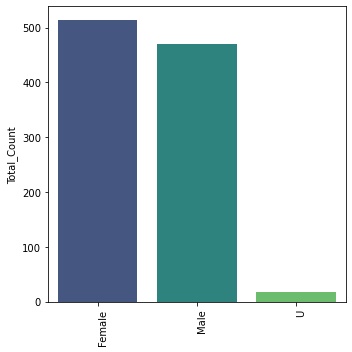


 -------------------------------------------------------------------------------------------------
Number of unique values in job_industry_category is 9 



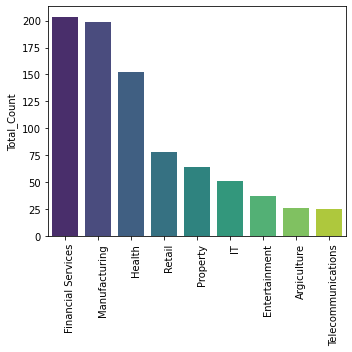


 -------------------------------------------------------------------------------------------------
Number of unique values in wealth_segment is 3 



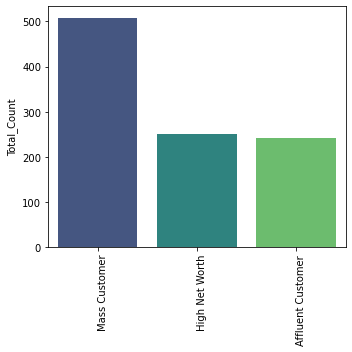


 -------------------------------------------------------------------------------------------------
Number of unique values in deceased_indicator is 1 



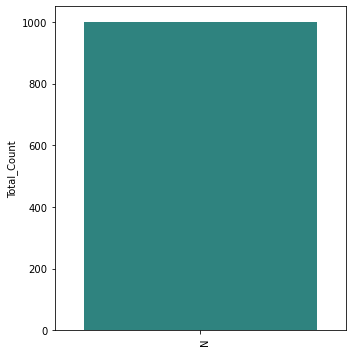


 -------------------------------------------------------------------------------------------------
Number of unique values in owns_car is 2 



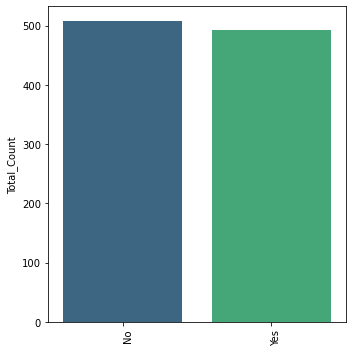


 -------------------------------------------------------------------------------------------------
Number of unique values in state is 3 



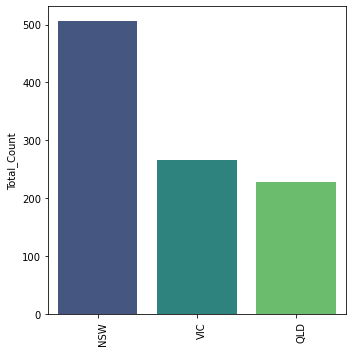


 -------------------------------------------------------------------------------------------------
Number of unique values in country is 1 



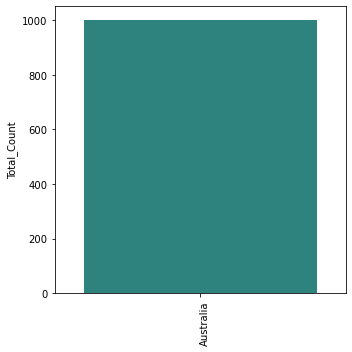


 -------------------------------------------------------------------------------------------------


In [143]:
%matplotlib inline
cat_column_list = ['gender','job_industry_category', 'wealth_segment', 'deceased_indicator', 'owns_car', 'state', 'country']

for column in cat_column_list:
    count_uniques = pd.DataFrame(new_customers[column].value_counts()).rename(columns={column:'Total_Count'}).sort_values('Total_Count',ascending=False)
    
    # parameters in format function.
    print(color.BOLD +"Number of unique values in {} is {}".format(column, count_uniques.shape[0]), "\n"+ color.END)

    # Create Figure
    fig, ax = plt.subplots(figsize=(5,5))

    ax = sns.barplot(x=count_uniques.index.values.tolist()  , y="Total_Count", data=count_uniques, palette= 'viridis')
    # rotates labels and aligns them horizontally to left 
    plt.setp( ax.xaxis.get_majorticklabels(), rotation=90, ha="left" )

    plt.tight_layout()
    plt.show()

    print("\n",'-------------------------------------------------------------------------------------------------')

### gender
change "U" : "Unidentified"

In [144]:
gender_dict = {"U" : "Unidentified"}
new_customers.replace({"gender": gender_dict},inplace=True)

### owns_car
Encode owns car to "Yes" : 1, "No" : 0

In [145]:
car_dict = {"Yes" : 1, "No" : 0}
new_customers.replace({"owns_car": car_dict},inplace=True)

### state
In states NSW & New South Wales and also VIC & Victoria are same we can replace those values

In [146]:
state_dict = {"NSW" : 'New South Wales', "VIC" : 'Victoria', "QLD" : 'Queensland'}
new_customers.replace({"state": state_dict},inplace=True)

### drop columns deceased_indicator and country

In [147]:
new_customers.drop(['deceased_indicator','country'], axis = 1, inplace=True)

### <span style='color:green'>Missing Value Treatment</span>

In [148]:
print(color.BOLD +color.BLUE +"\n","Null values in the columns of dataset"+ color.END)
new_customers.isnull().sum()


 Null values in the columns of dataset


gender                                   0
past_3_years_bike_related_purchases      0
job_title                              106
job_industry_category                  165
wealth_segment                           0
owns_car                                 0
tenure                                   0
postcode                                 0
state                                    0
property_valuation                       0
customer_id                              0
age                                     17
dtype: int64

There are some null values in the age, job industry and title column we will replace those as done previously

### job_industry_category

In [149]:
new_customers['job_industry_category'] = new_customers.groupby(['gender','age','postcode'], sort=True)['job_industry_category'].fillna(new_customers['job_industry_category'].mode()[0])

replaced the missing values in the job_industry_category with group mode of 'gender','age','postcode'
There are still some more values missing replace them with group by state and mode

In [150]:
new_customers['job_industry_category'] = new_customers.groupby(['state'], sort=True)['job_industry_category'].fillna(new_customers['job_industry_category'].mode()[0])

In [151]:
new_customers['job_industry_category'] = new_customers['job_industry_category'].fillna(new_customers['job_industry_category'].mode()[0])

### job_title

In [152]:
new_customers['job_title'] = new_customers.groupby(['gender','age','job_industry_category','postcode'], sort=True)['job_title'].fillna(new_customers["job_title"].mode()[0])

replaced the missing values in the job_title with group mode of 'gender','age','job_industry_category','postcode'

In [153]:
new_customers['job_title'] = new_customers.groupby(['state','job_industry_category'], sort=True)['job_title'].fillna(new_customers["job_title"].mode()[0])

replaced the missing values in the job_title with group mode of 'state' & 'job_industry_category'

In [154]:
new_customers['job_title'] = new_customers['job_title'].fillna(new_customers["job_title"].mode()[0])

replaced the missing values in the job_title with group mode 

### age

In [155]:
new_customers['age'] = new_customers.groupby(['postcode','gender','job_industry_category','job_title'], sort=True)['age'].fillna(new_customers["age"].mean())

replaced the missing values in the age with group mean of 'postcode','gender','job_industry_category','job_title'

In [156]:
print(color.BOLD +color.BLUE +"\n","Null values in the columns of dataset"+ color.END)
new_customers.isnull().sum()


 Null values in the columns of dataset


gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
owns_car                               0
tenure                                 0
postcode                               0
state                                  0
property_valuation                     0
customer_id                            0
age                                    0
dtype: int64

no more missing values

In [157]:
#new_customers.to_excel("new_customers.xlsx")  